In [ ]:
import pandas as pd

hist_df = pd.read_csv('Historical Data.csv')
feat_df = pd.read_csv('Merged Features.csv')

In [ ]:
hist_df.head()

,INCIDENT_ID,STREET_ADDRESS,IN_ZIP,LONGITUDE,LATITUDE,FIRE_TYPE,INCIDENT_DURATION_MIN,ALARM_DATE_TIME_AMERICA_NY,YEAR,PROPERTY_LOSS_DOLLARS,PROPERTY_USE,FIRE_AREA_OF_ORIGIN,HEAT_SOURCE,ITEM_FIRST_IGNITED,CAUSE_OF_IGNITION,UNIT_1ST_ARRIVE,UNIT_1ST_RESP_TM_MIN,CIVILIAN_CASUALTY,FIRE SERVICE CASUALTY,Unnamed: 19
0,2000930,2400 FONTAINE AVE,22901,-78.494770,38.069870,Natural vegetation fire ...,17.35,4/14/02 12:38 PM,2002,0.0,Undetermined,NaN,NaN,NaN,Undetermined,E6,3.50,NaN,NaN,NaN
1,201700002343,152 BRANDYWINE COURT,22901,-78.486887,38.057879,Building fire,93.80,3/10/17 10:34 PM,2017,10000.0,1 or 2 family dwelling,"Courtyard, patio, terrace",Undetermined,Undetermined,Unintentional,E7,7.72,1.0,NaN,NaN
2,2003463,219 5TH ST SW,22903,-78.488751,38.029425,Mobile property (vehicle) fire ...,9.43,11/14/02 7:46 AM,2002,0.0,NaN,NaN,NaN,NaN,NaN,BC2,0.05,NaN,NaN,NaN
3,2003769,NaN,22902,-78.490470,38.009550,Structure Fire ...,24.90,12/11/02 9:30 AM,2002,0.0,1 or 2 family dwelling,NaN,NaN,NaN,NaN,BC2,1.60,NaN,NaN,NaN
4,2003827,822 HARDY DR,22901,-78.494770,38.069870,Structure Fire ...,98.75,12/17/02 2:38 AM,2002,15000.0,Multifamily dwelling,"Cooking area, kitchen","Heat from powered equipment, other","Box, carton, bag, basket, barrel",Intentional,E7,5.93,NaN,NaN,NaN


In [ ]:
hist_df = hist_df[hist_df['STREET_ADDRESS'].notnull()]
hist_df = hist_df.reset_index(drop=True)
hist_df['JoinValue'] = ''

In [ ]:
feat_df.head()

,StreetNumber,StreetName,Unit,ZIP,MasterAddressID,BIN,StateCode,GPIN,Zone,ParcelNumber,Acreage,OrigStreetNumber,RangeFlag,Index,UseCode,Style,Grade,Roof,Flooring,Heating,Fireplace,YearBuilt,TotalRooms,Bedrooms,FullBathrooms,BasementGarage,Basement,FinishedBasement,BasementType,ExternalWalls,NumberOfStories,SquareFootageFinishedLiving,resStreetName,resStreetNumber,resUnit,GrossArea,StoryHeight,commStreetName,commStreetNumber,commUnit,FileType,LotSquareFeet,TaxYear,Zoning,Assessment,X,Y,OwnerName,ZipCode
0,1800.0,JEFFERSON PARK AVE,306,22903.0,88158.0,7881935.0,1.0 Residential (Urban),7881.0,UHD,160129220,0.0,1800,No,1230.0,Condominium,1 Story,C,Built Up,None,Forced Air,0,1966.0,4,2,1,NaN,0.0,0.0,No Basement,Brick Veneer,1.00,813.0,JEFFERSON PARK AVE,1800.0,306,NaN,NaN,NaN,NaN,NaN,R,0.0,2020 Value:,UHD,197000.0,-78.508711,38.027815,"PAN, ZHI F & JIN S",22903.0
1,428.0,MONROE LN,207,22903.0,89072.0,13937149.0,1.0 Residential (Urban),13937.0,UHD,110117270,0.0,428,No,794.0,Condominium,1 Story,B,Built Up,Hardwood,Heat Pump,0,2007.0,3,1,1,NaN,0.0,0.0,No Basement,Brick Veneer,1.00,700.0,MONROE LN,428.0,207,NaN,NaN,NaN,NaN,NaN,R,0.0,2020 Value:,UHD,267300.0,-78.502789,38.030989,"ABDULLAH, DAVID CLIFFORD",22903.0
2,1800.0,JEFFERSON PARK AVE,36,22903.0,90702.0,7671708.0,1.0 Residential (Urban),7671.0,UHD,160128360,0.0,1800,No,1172.0,Condominium,1 Story,C,Built Up,None,Forced Air,0,1966.0,3,1,1,NaN,0.0,0.0,No Basement,Brick Veneer,1.00,564.0,JEFFERSON PARK AVE,1800.0,36,NaN,NaN,NaN,NaN,NaN,R,0.0,2020 Value:,UHD,114600.0,-78.509172,38.028887,"HALL MCINTIRE PROPERTIES, LLC",22903.0
3,2104.0,JEFFERSON PARK AVE,B,22903.0,90960.0,88451591.0,1.0 Residential (Urban),8845.0,UHD,170080140,0.0,2104,No,1515.0,Condominium,2 Story,C,Shingles,W/W Carpet,Forced Air,0,1978.0,5,3,2,NaN,0.0,0.0,No Basement,Wood,2.00,916.0,JEFFERSON PARK AVE,2104.0,B,NaN,NaN,NaN,NaN,NaN,R,0.0,2020 Value:,UHD,170400.0,-78.513791,38.025991,"PAUL'S RENTAL PROPERTIES, LLC",22901.0
4,511.0,1ST ST N,407,22902.0,105740.0,559316365.0,1.0 Residential (Urban),5593.0,R-3H,330001407,0.0,511,No,6255.0,Condominium,1 Story,C++,Built Up,Hardwood,Forced Air,NaN,1967.0,5,2,1,NaN,0.0,0.0,No Basement,Brick Veneer,1.00,834.0,1ST ST N,511.0,407,NaN,NaN,NaN,NaN,NaN,R,0.0,2020 Value:,R-3H,184800.0,-78.480641,38.034923,"MOSBY REALTY, LLC",22901.0


In [ ]:
feat_df = feat_df[feat_df['StreetName'].notnull()]
feat_df = feat_df.reset_index(drop=True)

In [ ]:
all_addresses = set()
joins = []
addr_abbrevs = {'ROAD':'RD', 'STREET':'ST', 'AVENUE':'AVE', 'DRIVE':'DR', 'CIRCLE':'CIR', 'COURT':'CT', 'LANE':'LN', 'TERRACE':'TER', 'PLACE':'PL', 'EXTENSION':'EXT', 'TRAIL':'TR', 'NORTH':'N', 'SOUTH':'S', 'EAST':'E', 'WEST':'W'}
for i in range(len(feat_df)):
  try:
    addr = str(int(feat_df['StreetNumber'][i])) + " " + feat_df['StreetName'][i]
  except:
    addr = feat_df['StreetName'][i]
  addr = ' '.join(addr.strip().split())
  for long,short in addr_abbrevs.items():
    addr = addr.replace(long, short)
  all_addresses.add(addr)
  joins.append(addr)

feat_df['JoinValue'] = joins

In [ ]:
all_addresses

{'639 BOOKER ST',
 '1228 CEDARS CT',
 '1224 MONTICELLO RD',
 '515 CAROLINE AVE',
 '1200 LONG ST',
 '1112 GORDON AVE',
 '537 2ND ST NE',
 '1106 LITTLE HIGH ST',
 '2303 N BERKSHIRE RD',
 '307 7TH ST SW',
 '815 E JEFFERSON ST',
 '104 OAK ST',
 '1929 LEWIS MOUNTAIN RD',
 '1114 LITTLE HIGH ST',
 '114 AZALEA DR',
 '2009 MEADOWBROOK RD',
 '2211 WAYNE AVE',
 '2227 BANBURY ST',
 '716 HIGHLAND AVE',
 '633 BLENHEIM AVE',
 '1615 ROSE HILL DR',
 '1313 HILLTOP RD',
 '511 7 1/2 ST SW',
 '102 KENWOOD CIR',
 '128 JUNCTION LN',
 '2028 BARRACKS RD',
 '1912 CEDAR HILL RD',
 '1225 BELLEVIEW AVE',
 '1745 ALLIED ST',
 '209 PALATINE AVE',
 '220 BURNET ST',
 '1747 ALLIED ST',
 '182 BROOKWOOD DR',
 '217 AZALEA DR',
 '2028 MINOR RD',
 '305 CHESTNUT ST',
 '1613 OXFORD RD',
 '1105 ELLIOTT AVE',
 '2309 CRESTMONT AVE',
 '1025 LOCUST AVE',
 '100 PAYNES MILL RD',
 '309 MONTE VISTA AVE',
 '910 KING ST',
 '111 SHASTA CT',
 '911 PAOLI ST',
 '929 CHARLTON AVE',
 '310 4TH ST SE',
 '1205 BLAND CIR',
 '114 BLINCOE LN',
 '131

In [ ]:
hasMatch = 0
lacksMatch = 0
matchless = []
joins = []
for i in range(len(hist_df)):
  addr = hist_df['STREET_ADDRESS'][i]
  addr = ' '.join(addr.strip().split())
  for long,short in addr_abbrevs.items():
    addr = addr.replace(long, short)
  if addr in all_addresses:
    hasMatch += 1
  else:
    lacksMatch += 1
    matchless.append(addr)
  joins.append(addr)

hist_df['JoinValue'] = joins

In [ ]:
print(hasMatch)
print(lacksMatch)

1116
617


In [ ]:
merged_data = pd.merge(left=feat_df, right=hist_df, left_on='JoinValue', right_on='JoinValue')
merged_data.tail(50)

,StreetNumber,StreetName,Unit,ZIP,MasterAddressID,BIN,StateCode,GPIN,Zone,ParcelNumber,Acreage,OrigStreetNumber,RangeFlag,Index,UseCode,Style,Grade,Roof,Flooring,Heating,Fireplace,YearBuilt,TotalRooms,Bedrooms,FullBathrooms,BasementGarage,Basement,FinishedBasement,BasementType,ExternalWalls,NumberOfStories,SquareFootageFinishedLiving,resStreetName,resStreetNumber,resUnit,GrossArea,StoryHeight,commStreetName,commStreetNumber,commUnit,FileType,LotSquareFeet,TaxYear,Zoning,Assessment,X,Y,OwnerName,ZipCode,JoinValue,INCIDENT_ID,STREET_ADDRESS,IN_ZIP,LONGITUDE,LATITUDE,FIRE_TYPE,INCIDENT_DURATION_MIN,ALARM_DATE_TIME_AMERICA_NY,YEAR,PROPERTY_LOSS_DOLLARS,PROPERTY_USE,FIRE_AREA_OF_ORIGIN,HEAT_SOURCE,ITEM_FIRST_IGNITED,CAUSE_OF_IGNITION,UNIT_1ST_ARRIVE,UNIT_1ST_RESP_TM_MIN,CIVILIAN_CASUALTY,FIRE SERVICE CASUALTY,Unnamed: 19
13280,1414.0,CHERRY AVE,NaN,22903.0,100933.0,9.605221e+07,1.0 Residential (Urban),9605.0,R-1S,230111000,0.189,1414,No,3065.0,Single Family,1 Sty w/ Bsmt,C +,Shingles,Hardwood,Forced Air,0,1950.0,5,2,1,0,439.0,NaN,Partial Basement,Concrete Block,1.00,898.0,CHERRY AVE,1414.0,NaN,NaN,NaN,NaN,NaN,NaN,R,0.00,2020 Value:,R-1S,212500.0,-78.502114,38.024433,"RINDGE, ANNE M",22903.0,1414 CHERRY AVE,2003372,1414 CHERRY AVE,22902,-78.502352,38.024618,Natural vegetation fire ...,8.60,10/31/10 6:03 PM,2010,0.0,1 or 2 family dwelling,NaN,NaN,NaN,"Debris, vegetation burn",E7,4.85,NaN,NaN,NaN
13281,1341.0,LONG ST,NaN,22901.0,99747.0,5.488806e+07,4.0 Commercial & Industrial,5488.0,CC,490096000,1.226,1341,No,10577.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10125.0,12.0,LONG ST,1341.0,NaN,C,53404.56,2020 Value:,CC,3644600.0,-78.459459,38.035394,"LONG STREET PROPERTIES, LLC",22902.0,1341 LONG ST,2504020,1341 LONG ST,22902,-78.459391,38.035010,Natural vegetation fire ...,8.35,9/6/05 1:43 PM,2005,0.0,NaN,NaN,NaN,NaN,Smoking,E4,3.35,NaN,NaN,NaN
13282,1341.0,LONG ST,NaN,22901.0,99747.0,5.488806e+07,4.0 Commercial & Industrial,5488.0,CC,490096000,1.226,1341,No,10577.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10125.0,12.0,LONG ST,1341.0,NaN,C,53404.56,2020 Value:,CC,3644600.0,-78.459459,38.035394,"LONG STREET PROPERTIES, LLC",22902.0,1341 LONG ST,2601980,1341 LONG ST,22903,-78.459391,38.035010,Natural vegetation fire ...,11.42,4/30/06 6:37 AM,2006,2.0,"Food and beverage sales, grocery store","Outside area, other",Undetermined,"Organic materials, other",Cause undetermined after investigation,E1,3.25,NaN,NaN,NaN
13283,1108.0,WARE ST,NaN,22902.0,99755.0,1.070234e+08,1.0 Residential (Urban),10702.0,R-2,270063000,0.146,1108,No,4281.0,Single Family,1 Story,C,Shingles,Hardwood,Forced Air,0,1947.0,4,2,1,0,0.0,0.0,No Basement,Stucco,1.00,672.0,WARE ST,1108.0,NaN,NaN,NaN,NaN,NaN,NaN,R,6359.76,2020 Value:,R-2,198600.0,-78.484693,38.022128,"FINUCANE, JAMES & TONI F KISTNER",22902.0,1108 WARE ST,2043971,1108 WARE ST,22902,-78.484880,38.022047,Structure Fire ...,221.47,10/31/04 9:43 PM,2004,35000.0,1 or 2 family dwelling,Bedroom - < 5 persons; included are jail or pr...,Undetermined,Undetermined,Cause under investigation,BC1,2.77,NaN,NaN,NaN
13284,1215.0,AUGUSTA ST,NaN,22903.0,99763.0,2.932135e+08,1.0 Residential (Urban),2932.0,R-1,370085180,0.262,1215,No,7300.0,Single Family,1 Story,B,Shingles,Hardwood,Forced Air,1,1956.0,7,3,2,0,1109.0,660.0,Full Basement,Brick Veneer,1.00,1109.0,AUGUSTA ST,1215.0,NaN,NaN,NaN,NaN,NaN,NaN,R,11412.72,2020 Value:,R-1,328500.0,-78.486071,38.043369,"GERMANO, SONAM D",22903.0,1215 AUGUSTA ST,2200092,1215 AUGUSTA ST,22902,-78.485963,38.043563,Structure Fire ...,29.30,1/6/12 12:38 PM,2012,0.0,1 or 2 family dwelling,NaN,NaN,NaN,NaN,CHF2,4.67,NaN,NaN,NaN
13285,412.0,E MAIN ST,NaN,22902.0,99767.0,7.348342e+07,4.0 Commercial & Industrial,7185.0,DH,530060000,0.071,411-13,Yes,11579.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5538.0,12.0,E MAIN ST,41113.0,NaN,C,3092.76,2020 Value:,DH,1444200.0,-78.478853,38.

In [ ]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13330 entries, 0 to 13329
Data columns (total 70 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   StreetNumber                 13330 non-null  float64
 1   StreetName                   13330 non-null  object 
 2   Unit                         12455 non-null  object 
 3   ZIP                          13328 non-null  float64
 4   MasterAddressID              13328 non-null  float64
 5   BIN                          13328 non-null  float64
 6   StateCode                    13328 non-null  object 
 7   GPIN                         13330 non-null  float64
 8   Zone                         13330 non-null  object 
 9   ParcelNumber                 13330 non-null  object 
 10  Acreage                      13328 non-null  float64
 11  OrigStreetNumber             13328 non-null  object 
 12  RangeFlag                    13328 non-null  object 
 13  Index           

In [ ]:
import numpy as np

use_codes = {
    'Multipurpose Bldg (College)':'School',
    'Vacant Land':'Vacant',
    'Single Family':'Residential',
    'Single Family-1 Conversion':'Residential',
    'Single Family-2 Conversion':'Residential',
    'Duplex':'Residential Multifamily',
    'Common Area':'Assembly',
    'Condo Common Area':'Assembly',
    'Clubhouse':'Assembly',
    'Elementary Sch (Entire)':'School',
    'Single Family Attached':'Residential',
    'Condominium':'Residential',
    'Parking Lot':'Vacant',
    'Apartments over 20 units':'Residential Multifamily',
    'Apartments 1-10 units':'Residential Multifamily',
    'Fraternity\Sorority House':'Residential Multifamily',
    'Apartments 11-20 Units':'Residential Multifamily',
    'Triplex':'Residential Multifamily',
    'Office':'Commercial',
    'Rooming House':'Residential Multifamily',
    'Office Building':'Commercial',
    'Vacant Commercial (B1-B3)':'Vacant',
    'Parking Structure':'Commercial',
    'Hospital':'Commercial',
    'Hotel':'Commercial',
    'Single Family-3 Conversion':'Residential',
    'Church':'Assembly',
    'Condominium Commercial':'Commercial',
    'Fire Station (staff)':'Government',
    'Warehouse Showroom Store':'Commercial',
    'Cemetery':'Vacant',
    'Mixed Retail w/Res Units':'Mixed',
    'Retail Store':'Commercial',
    'Commercial':'Commercial',
    'Vacant Industrial (M1,M3,PMD)':'Vacant',
    'Dormitory':'Residential Multifamily',
    'Bank':'Commercial',
    'Four-Level Split':'Residential',
    'Three-Level Split':'Residential',
    'Rectory':'Assembly',
    'City Club':'Assembly',
    'Service Repair Garage':'Industrial',
    'Medical Office':'Commercial',
    'Condominium - Flex':'Residential Multifamily',
    'Classroom (Elem/2nd Sch)':'School',
    'Industrial Light Manufacturing':'Industrial',
    'Quadplex':'Residential Multifamily',
    'Restaurant':'Commercial',
    'Market':'Commercial',
}

styles = {
    '1 Story':1,
    '1 Sty No Bsmt':1,
    '1 Sty w/ Bsmt':1,
    '1 Sty (Avg)':1,
    '1 Sty Attached':1,
    '1.5 Story':1.5,
    '1.5 Sty Attached':1.5,
    '1.5 Sty (Avg)':1.5,
    '2 Story':2,
    '2 Sty (Avg)':2,
    '2 Story (Avg)':2,
    '2 Sty Attached':2,
    '2 Sty No Bsmt':2,
    '2.5 Story':2.5,
    '2.5 Story (Avg)':2.5,
    '2.5 Sty Attached':2.5,
    '2.5 Sty Excellent':2.5,
    '2.5 Sty Superior':2.5,
    '3 Story':3,
    '3 Sty Attached':3,
    '3.5 Story':3.5,
    '4-Level Split':4,
    'Condominimum':1,
    'Contemp.':1,
    'Contemporary':1,
    'No Style':1,
    'Ranch':1,
    'Split-Foyer':2,
    'Split-Foyer (Avg)':2,
    'Split-Level':2,
    'Split-Level (Avg)':2,
    'Split-Level Superior':2,
    'Tri-level':3,
    'Vacant Land':0,
    'No data':1, 
    '':0
}

grades = {
    'A':1,
    'A -':1,
    'A - Hist':1,
    'A +':1,
    'A++':1,
    'B':2,
    'B -':2,
    'B - Hist':2,
    'B +':2,
    'B++':2,
    'C':3,
    'C -':3,
    'C - Hist':3,
    'C +':3,
    'C++':3,
    'D':4,
    'D -':4,
    'D +':4,
    'E':5,
    'E -':5,
    'No data':np.nan,
    '':np.nan
}

In [ ]:
merged_data = merged_data.reset_index(drop=True)

new_use_codes = []
new_styles = []
new_grades = []

for i in range(len(merged_data)):
  try:
    new_use_codes.append(use_codes[merged_data['UseCode'][i]])
  except:
    if merged_data['UseCode'].isnull()[i]:
      new_use_codes.append('')
    else:
      print(merged_data['UseCode'][i])
  try:
    new_styles.append(styles[merged_data['Style'][i]])
  except:
    if merged_data['Style'].isnull()[i]:
      new_styles.append('')
    else:
      print(merged_data['Style'][i])
  try:
    new_grades.append(grades[merged_data['Grade'][i]])
  except:
    if merged_data['Grade'].isnull()[i]:
      new_grades.append('')
    else:
      print(merged_data['Grade'][i])

In [ ]:
merged_data['UseCode'] = new_use_codes
merged_data['Style'] = new_styles
merged_data['Grade'] = new_grades

In [ ]:
merged_data.tail()

,StreetNumber,StreetName,Unit,ZIP,MasterAddressID,BIN,StateCode,GPIN,Zone,ParcelNumber,Acreage,OrigStreetNumber,RangeFlag,Index,UseCode,Style,Grade,Roof,Flooring,Heating,Fireplace,YearBuilt,TotalRooms,Bedrooms,FullBathrooms,BasementGarage,Basement,FinishedBasement,BasementType,ExternalWalls,NumberOfStories,SquareFootageFinishedLiving,resStreetName,resStreetNumber,resUnit,GrossArea,StoryHeight,commStreetName,commStreetNumber,commUnit,FileType,LotSquareFeet,TaxYear,Zoning,Assessment,X,Y,OwnerName,ZipCode,JoinValue,INCIDENT_ID,STREET_ADDRESS,IN_ZIP,LONGITUDE,LATITUDE,FIRE_TYPE,INCIDENT_DURATION_MIN,ALARM_DATE_TIME_AMERICA_NY,YEAR,PROPERTY_LOSS_DOLLARS,PROPERTY_USE,FIRE_AREA_OF_ORIGIN,HEAT_SOURCE,ITEM_FIRST_IGNITED,CAUSE_OF_IGNITION,UNIT_1ST_ARRIVE,UNIT_1ST_RESP_TM_MIN,CIVILIAN_CASUALTY,FIRE SERVICE CASUALTY,Unnamed: 19
13325,930.0,ST CHARLES AVE,NaN,22901.0,102190.0,3.686143e+08,1.0 Residential (Urban),3686.0,R-1,480090000,0.344,930,No,9762.0,Residential,1,3,Architectural Shingles,Hardwood,Forced Air,0,1987.0,5,3,2,1,870.0,NaN,Partial Basement,Vinyl,1.00,1390.0,ST CHARLES AVE,930.0,NaN,NaN,NaN,NaN,NaN,NaN,R,14984.64,2020 Value:,R-1,390400.0,-78.464738,38.040590,"JACKSON, WHITNEY L & KEITH W",22901.0,930 ST CHARLES AVE,201700010188,930 ST CHARLES AVENUE,22901,-78.464847,38.040654,Building fire,286.93,11/3/17 5:20 PM,2017,100000.0,1 or 2 family dwelling,"Exterior balcony, unenclosed porch","Molten, hot material","Structural component or finish, other",Unintentional,TRK8,7.93,1.0,1.0,NaN
13326,956.0,ROCK CREEK RD,NaN,22903.0,102344.0,1.203852e+08,1.0 Residential (Urban),12020.0,R-2,22B305000,0.095,956,No,2863.0,Residential,2,4,Shingles,W/W Carpet,Heat Pump,0,1980.0,6,3,1,0,NaN,NaN,No Basement,Vinyl,2.00,1200.0,ROCK CREEK RD,956.0,NaN,NaN,NaN,NaN,NaN,NaN,R,0.00,2020 Value:,R-2,144100.0,-78.496873,38.018980,"MALLORY, CONNIE M",22903.0,956 ROCK CREEK RD,2903566,956 ROCK CREEK RD,22903,-78.497007,38.019184,Structure Fire ...,99.67,12/19/09 11:43 PM,2009,950.0,1 or 2 family dwelling,NaN,NaN,NaN,NaN,E7,7.93,NaN,NaN,NaN
13327,932.0,MONTICELLO AVE,NaN,22902.0,102359.0,1.073635e+08,1.0 Residential (Urban),10736.0,R-1S,570066000,0.112,932,No,13058.0,Residential,2,3,Shingles,Hardwood,Heat Pump,0,1925.0,6,3,3,0,NaN,NaN,No Basement,Aluminum,2.00,2032.0,MONTICELLO AVE,932.0,NaN,NaN,NaN,NaN,NaN,NaN,R,0.00,2020 Value:,R-1S,400400.0,-78.474798,38.021929,"HUNTER, KURTIS A",22902.0,932 MONTICELLO AVE,2902120,932 MONTICELLO AVE,22902,-78.474611,38.022010,Structure Fire ...,22.42,7/30/09 3:22 AM,2009,0.0,1 or 2 family dwelling,"Cooking area, kitchen","Radiated, conducted heat from operating equipment","Cooking materials, including edible materials",Unintentional,E7,4.57,NaN,NaN,NaN
13328,815.0,ANDERSON ST,,22903.0,105397.0,5.470117e+09,1.0 Residential (Urban),5470.0,R-1S,310245000,0.275,815,No,5958.0,Residential,1,3,Architectural Shingles,Hardwood,Heat Pump,No dat,2018.0,7,3,2,No dat,NaN,NaN,No Basement,Brick Veneer,1,1728.0,ANDERSON ST,815.0,NaN,NaN,NaN,NaN,NaN,NaN,R,11979.00,2020 Value:,R-1S,406900.0,-78.490159,38.035522,"INGE, GEORGE ROGER & EURSALINE J",22903.0,815 ANDERSON ST,201800003485,815 ANDERSON STREET,22903,-78.490057,38.035130,Building fire,261.53,4/14/18 4:03 PM,2018,10000.0,1 or 2 family dwelling,Wall surface: exterior,Electrical arcing,Undetermined,Unintentional,A01,5.64,1.0,NaN,NaN
13329,815.0,ANDERSON ST,,22903.0,105397.0,5.470117e+09,1.0 Residential (Urban),5470.0,R-1S,310245000,0.275,815,No,5958.0,Residential,2,4,Metal,Hardwood,Forced Air,1,1920.0,8,4,1,0,230.0,NaN,Partial Basement,Wood,2.00,1977.0,ANDERSON ST,815.0,NaN,NaN,NaN,NaN,NaN,NaN,R,11979.00,2020 Value:,R-1S,406900.0,-78.490159,38.035522,"INGE, GEORGE ROGER & EURSALINE J",22903.0,815 ANDERSON ST,201800003485,815 ANDERSON STREET,22903,-78.490057,38.035130,Building fire,261.53,4/14/18 4:03 PM,2018,10000.0,1 or 2 family dwelling,Wall surface: exterior,Electrical arcing,Undetermined,Unintentional,A01,5.64,1.0,NaN,NaN


In [ ]:
columns_to_drop = ['StreetNumber', 'StreetName', 'Unit', 'ZIP', 'MasterAddressID', 'BIN', 'GPIN', 'Zone', 'ParcelNumber', 'OrigStreetNumber', 'RangeFlag', 'Index', 'resStreetName', 'resStreetNumber', 'resUnit', 'commStreetName', 'commStreetNumber', 'commUnit', 'FileType', 'Assessment', 'TaxYear', 'Zoning', 'OwnerName', 'ZipCode', 'JoinValue', 'INCIDENT_ID', 'STREET_ADDRESS', 'IN_ZIP', 'UNIT_1ST_ARRIVE']
categorical = ['StateCode', 'UseCode', 'Roof', 'Flooring', 'Heating', 'Fireplace', 'BasementGarage', 'BasementType', 'ExternalWalls', 'PROPERTY_USE']
numerical = ['Acreage', 'Style', 'Grade', 'YearBuilt', 'TotalRooms', 'Bedrooms', 'FullBathrooms', 'Basement', 'FinishedBasement', 'NumberOfStories', 'SquareFootageFinishedLiving', 'GrossArea', 'StoryHeight', 'LotSquareFeet', 'X', 'Y', 'LONGITUDE', 'LATITUDE']
label_generation = ['FIRE_TYPE', 'INCIDENT_DURATION_MIN', 'PROPERTY_LOSS_DOLLARS', 'FIRE_AREA_OF_ORIGIN', 'HEAT_SOURCE', 'ITEM_FIRST_IGNITED', 'CAUSE_OF_IGNITION', 'UNIT_1ST_RESP_TM_MIN', 'CIVILIAN_CASUALTY', 'FIRE SERVICE CASUALTY']

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
merged_data['PROPERTY_LOSS_DOLLARS'] = scaler.fit_transform(merged_data[['PROPERTY_LOSS_DOLLARS']])
merged_data['INCIDENT_DURATION_MIN'] = scaler.fit_transform(merged_data[['INCIDENT_DURATION_MIN']])
merged_data['UNIT_1ST_RESP_TM_MIN'] = scaler.fit_transform(merged_data[['UNIT_1ST_RESP_TM_MIN']])

In [ ]:
merged_data.tail()

,StreetNumber,StreetName,Unit,ZIP,MasterAddressID,BIN,StateCode,GPIN,Zone,ParcelNumber,Acreage,OrigStreetNumber,RangeFlag,Index,UseCode,Style,Grade,Roof,Flooring,Heating,Fireplace,YearBuilt,TotalRooms,Bedrooms,FullBathrooms,BasementGarage,Basement,FinishedBasement,BasementType,ExternalWalls,NumberOfStories,SquareFootageFinishedLiving,resStreetName,resStreetNumber,resUnit,GrossArea,StoryHeight,commStreetName,commStreetNumber,commUnit,FileType,LotSquareFeet,TaxYear,Zoning,Assessment,X,Y,OwnerName,ZipCode,JoinValue,INCIDENT_ID,STREET_ADDRESS,IN_ZIP,LONGITUDE,LATITUDE,FIRE_TYPE,INCIDENT_DURATION_MIN,ALARM_DATE_TIME_AMERICA_NY,YEAR,PROPERTY_LOSS_DOLLARS,PROPERTY_USE,FIRE_AREA_OF_ORIGIN,HEAT_SOURCE,ITEM_FIRST_IGNITED,CAUSE_OF_IGNITION,UNIT_1ST_ARRIVE,UNIT_1ST_RESP_TM_MIN,CIVILIAN_CASUALTY,FIRE SERVICE CASUALTY,Unnamed: 19
13325,930.0,ST CHARLES AVE,NaN,22901.0,102190.0,3.686143e+08,1.0 Residential (Urban),3686.0,R-1,480090000,0.344,930,No,9762.0,Residential,1,3,Architectural Shingles,Hardwood,Forced Air,0,1987.0,5,3,2,1,870.0,NaN,Partial Basement,Vinyl,1.00,1390.0,ST CHARLES AVE,930.0,NaN,NaN,NaN,NaN,NaN,NaN,R,14984.64,2020 Value:,R-1,390400.0,-78.464738,38.040590,"JACKSON, WHITNEY L & KEITH W",22901.0,930 ST CHARLES AVE,201700010188,930 ST CHARLES AVENUE,22901,-78.464847,38.040654,Building fire,0.098835,11/3/17 5:20 PM,2017,0.108015,1 or 2 family dwelling,"Exterior balcony, unenclosed porch","Molten, hot material","Structural component or finish, other",Unintentional,TRK8,0.223320,1.0,1.0,NaN
13326,956.0,ROCK CREEK RD,NaN,22903.0,102344.0,1.203852e+08,1.0 Residential (Urban),12020.0,R-2,22B305000,0.095,956,No,2863.0,Residential,2,4,Shingles,W/W Carpet,Heat Pump,0,1980.0,6,3,1,0,NaN,NaN,No Basement,Vinyl,2.00,1200.0,ROCK CREEK RD,956.0,NaN,NaN,NaN,NaN,NaN,NaN,R,0.00,2020 Value:,R-2,144100.0,-78.496873,38.018980,"MALLORY, CONNIE M",22903.0,956 ROCK CREEK RD,2903566,956 ROCK CREEK RD,22903,-78.497007,38.019184,Structure Fire ...,0.034242,12/19/09 11:43 PM,2009,0.001026,1 or 2 family dwelling,NaN,NaN,NaN,NaN,E7,0.223320,NaN,NaN,NaN
13327,932.0,MONTICELLO AVE,NaN,22902.0,102359.0,1.073635e+08,1.0 Residential (Urban),10736.0,R-1S,570066000,0.112,932,No,13058.0,Residential,2,3,Shingles,Hardwood,Heat Pump,0,1925.0,6,3,3,0,NaN,NaN,No Basement,Aluminum,2.00,2032.0,MONTICELLO AVE,932.0,NaN,NaN,NaN,NaN,NaN,NaN,R,0.00,2020 Value:,R-1S,400400.0,-78.474798,38.021929,"HUNTER, KURTIS A",22902.0,932 MONTICELLO AVE,2902120,932 MONTICELLO AVE,22902,-78.474611,38.022010,Structure Fire ...,0.007596,7/30/09 3:22 AM,2009,0.000000,1 or 2 family dwelling,"Cooking area, kitchen","Radiated, conducted heat from operating equipment","Cooking materials, including edible materials",Unintentional,E7,0.128458,NaN,NaN,NaN
13328,815.0,ANDERSON ST,,22903.0,105397.0,5.470117e+09,1.0 Residential (Urban),5470.0,R-1S,310245000,0.275,815,No,5958.0,Residential,1,3,Architectural Shingles,Hardwood,Heat Pump,No dat,2018.0,7,3,2,No dat,NaN,NaN,No Basement,Brick Veneer,1,1728.0,ANDERSON ST,815.0,NaN,NaN,NaN,NaN,NaN,NaN,R,11979.00,2020 Value:,R-1S,406900.0,-78.490159,38.035522,"INGE, GEORGE ROGER & EURSALINE J",22903.0,815 ANDERSON ST,201800003485,815 ANDERSON STREET,22903,-78.490057,38.035130,Building fire,0.090074,4/14/18 4:03 PM,2018,0.010801,1 or 2 family dwelling,Wall surface: exterior,Electrical arcing,Undetermined,Unintentional,A01,0.158667,1.0,NaN,NaN
13329,815.0,ANDERSON ST,,22903.0,105397.0,5.470117e+09,1.0 Residential (Urban),5470.0,R-1S,310245000,0.275,815,No,5958.0,Residential,2,4,Metal,Hardwood,Forced Air,1,1920.0,8,4,1,0,230.0,NaN,Partial Basement,Wood,2.00,1977.0,ANDERSON ST,815.0,NaN,NaN,NaN,NaN,NaN,NaN,R,11979.00,2020 Value:,R-1S,406900.0,-78.490159,38.035522,"INGE, GEORGE ROGER & EURSALINE J",22903.0,815 ANDERSON ST,201800003485,815 ANDERSON STREET,22903,-78.490057,38.035130,Building fire,0.090074,4/14/18 4:03 PM,2018,0.010801,1 or 2 family dwelling,Wall surface: exterior,Electrical arcing,Undetermined,Unintentional,A01,0.158667,1.0,NaN,NaN


In [ ]:
merged_data = merged_data.fillna(0)
merged_data['Severity Label'] = merged_data['INCIDENT_DURATION_MIN'] + merged_data['PROPERTY_LOSS_DOLLARS'] + merged_data['UNIT_1ST_RESP_TM_MIN'] + merged_data['CIVILIAN_CASUALTY'] + merged_data['FIRE SERVICE CASUALTY']

In [ ]:
merged_data.tail(15)

,StreetNumber,StreetName,Unit,ZIP,MasterAddressID,BIN,StateCode,GPIN,Zone,ParcelNumber,Acreage,OrigStreetNumber,RangeFlag,Index,UseCode,Style,Grade,Roof,Flooring,Heating,Fireplace,YearBuilt,TotalRooms,Bedrooms,FullBathrooms,BasementGarage,Basement,FinishedBasement,BasementType,ExternalWalls,NumberOfStories,SquareFootageFinishedLiving,resStreetName,resStreetNumber,resUnit,GrossArea,StoryHeight,commStreetName,commStreetNumber,commUnit,FileType,LotSquareFeet,TaxYear,Zoning,Assessment,X,Y,OwnerName,ZipCode,JoinValue,INCIDENT_ID,STREET_ADDRESS,IN_ZIP,LONGITUDE,LATITUDE,FIRE_TYPE,INCIDENT_DURATION_MIN,ALARM_DATE_TIME_AMERICA_NY,YEAR,PROPERTY_LOSS_DOLLARS,PROPERTY_USE,FIRE_AREA_OF_ORIGIN,HEAT_SOURCE,ITEM_FIRST_IGNITED,CAUSE_OF_IGNITION,UNIT_1ST_ARRIVE,UNIT_1ST_RESP_TM_MIN,CIVILIAN_CASUALTY,FIRE SERVICE CASUALTY,Unnamed: 19,Severity Label
13315,1215.0,LEE ST,0,22903.0,105516.0,6.499737e+08,7.2 Exempt State,6499.0,B-3,100116000,20.909,1215,No,656.0,Commercial,,,0,0,0,0,0.0,0,0,0,0,0.0,0.0,0,0,0,0.0,LEE ST,1215.0,0,311200.0,12.0,LEE ST,1215.0,0,E,910796.04,2020 Value:,B-3,424207800.0,-78.499389,38.031488,UNIVERSITY OF VA THE RECTOR & VISITORS,22903.0,1215 LEE ST,3600196,1215 LEE ST,22902,-78.498649,38.032000,Natural vegetation fire ...,0.003870,4/7/06 4:02 PM,2006,0.000011,Graded and cared-for plots of land,0,0,0,Undetermined,LAD01,0.141163,0.0,0.0,0.0,0.145044
13316,1215.0,LEE ST,0,22903.0,105516.0,6.499737e+08,7.2 Exempt State,6499.0,B-3,100116000,20.909,1215,No,656.0,Commercial,,,0,0,0,0,0.0,0,0,0,0,0.0,0.0,0,0,0,0.0,LEE ST,1215.0,0,311200.0,12.0,LEE ST,1215.0,0,E,910796.04,2020 Value:,B-3,424207800.0,-78.499389,38.031488,UNIVERSITY OF VA THE RECTOR & VISITORS,22903.0,1215 LEE ST,3900005,1215 LEE ST,22903,-78.498649,38.032000,Structure Fire ...,0.005095,1/4/09 1:28 PM,2009,0.000000,Hospital - medical or psychiatric,"Cooking area, kitchen",Heat source: other,"Cooking materials, including edible materials",Intentional,E2,0.025409,0.0,0.0,0.0,0.030504
13317,1215.0,LEE ST,0,22903.0,105516.0,6.499737e+08,7.2 Exempt State,6499.0,B-3,100116000,20.909,1215,No,656.0,Commercial,,,0,0,0,0,0.0,0,0,0,0,0.0,0.0,0,0,0,0.0,LEE ST,1215.0,0,311200.0,12.0,LEE ST,1215.0,0,E,910796.04,2020 Value:,B-3,424207800.0,-78.499389,38.031488,UNIVERSITY OF VA THE RECTOR & VISITORS,22903.0,1215 LEE ST,3900326,1215 LEE ST,22906,-78.498649,38.032000,"Fire, other ...",0.009669,7/1/09 9:43 AM,2009,0.000000,Hospital - medical or psychiatric,"Corridor, mall","Heat from powered equipment, other",Undetermined,Failure of equipment or heat source,E5,0.041220,0.0,0.0,0.0,0.050888
13318,1215.0,LEE ST,0,22903.0,105516.0,6.499737e+08,7.2 Exempt State,6499.0,B-3,100116000,20.909,1215,No,656.0,Commercial,,,0,0,0,0,0.0,0,0,0,0,0.0,0.0,0,0,0,0.0,LEE ST,1215.0,0,311200.0,12.0,LEE ST,1215.0,0,E,910796.04,2020 Value:,B-3,424207800.0,-78.499389,38.031488,UNIVERSITY OF VA THE RECTOR & VISITORS,22903.0,1215 LEE ST,3900358,1215 LEE ST,22903,-78.498649,38.032000,Structure Fire ...,0.004260,7/21/09 5:01 PM,2009,0.000000,Hospital - medical or psychiatric,"Cooking area, kitchen",Heat source: other,"Cooking materials, including edible materials",Unintentional,E2,0.053077,0.0,0.0,0.0,0.057337
13319,1215.0,LEE ST,0,22903.0,105516.0,6.499737e+08,7.2 Exempt State,6499.0,B-3,100116000,20.909,1215,No,656.0,Commercial,,,0,0,0,0,0.0,0,0,0,0,0.0,0.0,0,0,0,0.0,LEE ST,1215.0,0,311200.0,12.0,LEE ST,1215.0,0,E,910796.04,2020 Value:,B-3,424207800.0,-78.499389,38.031488,UNIVERSITY OF VA THE RECTOR & VISITORS,22903.0,1215 LEE ST,3900589,1215 LEE ST,22903,-78.498649,38.032000,Structure Fire ...,0.011821,11/30/09 7:55 AM,2009,0.005401,Hospital - medical or psychiatric,0,0,0,0,E7,0.117448,0.0,0.0,0.0,0.134670
13320,1215.0,LEE ST,0,22903.0,105516.0,6.499737e+08,7.2 Exempt State,6499.0,B-3,100116000,20.909,1215,No,656.0,Commercial,,,0,0,0,0,0.0,0,0,0,0,0.0,0.0,0,0,0,0.0,LEE ST,1215.0,0,311200.0,12.0,LEE ST,1215.0,0,E,910796.04,2020 Value:,B-3,424207800.0,-78.499389,38.031488,UNIVERSITY OF VA THE RECTOR & VISITORS,2

In [ ]:
for c in numerical:
  print(c, merged_data[c].dtype)

merged_data['Style'] = pd.to_numeric(merged_data['Style'], errors='coerce')
merged_data['Grade'] = pd.to_numeric(merged_data['Grade'], errors='coerce')
merged_data['TotalRooms'] = pd.to_numeric(merged_data['TotalRooms'], errors='coerce')
merged_data['Bedrooms'] = pd.to_numeric(merged_data['Bedrooms'], errors='coerce')
merged_data['FullBathrooms'] = pd.to_numeric(merged_data['FullBathrooms'], errors='coerce')
merged_data['NumberOfStories'] = pd.to_numeric(merged_data['NumberOfStories'], errors='coerce')

for c in numerical:
  print(c, merged_data[c].dtype)

Acreage float64
Style object
Grade object
YearBuilt float64
TotalRooms object
Bedrooms object
FullBathrooms object
Basement float64
FinishedBasement float64
NumberOfStories object
SquareFootageFinishedLiving float64
GrossArea float64
StoryHeight float64
LotSquareFeet float64
X float64
Y float64
LONGITUDE float64
LATITUDE float64
Acreage float64
Style float64
Grade float64
YearBuilt float64
TotalRooms float64
Bedrooms float64
FullBathrooms float64
Basement float64
FinishedBasement float64
NumberOfStories float64
SquareFootageFinishedLiving float64
GrossArea float64
StoryHeight float64
LotSquareFeet float64
X float64
Y float64
LONGITUDE float64
LATITUDE float64


In [ ]:
for c in categorical:
  print(c, merged_data[c].dtype, merged_data[c].unique())
  merged_data[c] = merged_data[c].replace(to_replace=[0, '', 'No dat', 'None'], value='No data')

for c in categorical:
  print(c, merged_data[c].dtype, merged_data[c].unique())

StateCode object ['1.0 Residential (Urban)' '3.0 Multi-Family'
 '4.0 Commercial & Industrial' '7.5 Exempt Multiple Non-Governmental'
 '7.6 Exempt Educational' 0 '7.3 Exempt Local'
 '7.8 Ex Benelovent Charitable' '7.7 Exempt Religious'
 '7.1 Exempt Federal' '8.0 State Corporation Commission'
 '7.2 Exempt State']
UseCode object ['Residential' '' 'Assembly' 'Vacant' 'Residential Multifamily'
 'Commercial' 'Mixed']
Roof object ['Built Up' 'Roll' 0 'Metal' 'Shingles' 'Rubber' 'No data'
 'Architectural Shingles' 'Shakes' 'Slate' 'Copper' 'Tile']
Flooring object ['None' 'Pre-Fab Wd' 'W/W Carpet' 'Hardwood' 'Parque' 'Vinyl' 0 'Typical'
 'Tile' 'Other' 'No data' 'Cement' 'Heart Pine' 'Linoleum']
Heating object ['Forced Air' 'Baseboard' 'Heat Pump' 'Not Applicable' 'Gravity' 0
 'Hot Water Radiator' 'No data' 'Gas Wall Unit' 'Floor Furnace' 'Radiant']
Fireplace object ['0' '1' 0 'No dat' '2' '3' '4' '5']
BasementGarage object [0 '0' '375' '398' '536' 'No dat' '2' '1']
BasementType object ['No Bas

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer

merged_data_dropped = merged_data.drop((columns_to_drop+label_generation), axis=1)
merged_data_dropped.tail()

X_all = merged_data_dropped[merged_data_dropped.columns[:-2]]
X_all.tail()
y_all = merged_data_dropped[merged_data_dropped.columns[-1]]
y_all.tail()

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', MinMaxScaler()),
    ])

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, numerical),
        ("cat", OneHotEncoder(), categorical),
    ])

X_all_pipelined = full_pipeline.fit_transform(X_all)

In [ ]:
print(X_all.shape)
print(X_all_pipelined.shape)
print(y_all.shape)

(13330, 30)
(13330, 187)
(13330,)


In [ ]:
X_train = X_all_pipelined[:10000]
X_test = X_all_pipelined[10000:]
y_train = y_all[:10000]
y_test = y_all[10000:]

In [ ]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(10000, 187) (3330, 187) (10000,) (3330,)


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

reg = LinearRegression().fit(X_train, y_train)
rmse = mean_squared_error(y_test, reg.predict(X_test))**.5

rmse

0.4536181551012166

In [ ]:
from sklearn.ensemble import RandomForestRegressor

reg = RandomForestRegressor().fit(X_train, y_train)
rmse = mean_squared_error(y_test, reg.predict(X_test))**.5

rmse

0.4184878129799507

In [ ]:
from sklearn.neural_network import MLPRegressor

reg = MLPRegressor().fit(X_train, y_train)
rmse = mean_squared_error(y_test, reg.predict(X_test))**.5

rmse

0.3926725353570849

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

reg = KNeighborsRegressor().fit(X_train, y_train)
rmse = mean_squared_error(y_test, reg.predict(X_test))**.5

rmse

0.37035536771676597

In [ ]:
from sklearn.svm import SVR

reg = SVR().fit(X_train, y_train)
rmse = mean_squared_error(y_test, reg.predict(X_test))**.5

rmse

0.3610728920298055

In [ ]:
from sklearn.model_selection import GridSearchCV

gsc = GridSearchCV(
        estimator=SVR(kernel='rbf'),
        param_grid={
            'C': [0.1, 1, 100, 1000],
            'epsilon': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10],
            'gamma': [0.0001, 0.001, 0.005, 0.1, 1, 3, 5]
        },
        cv=5, scoring='neg_mean_squared_error', verbose=0, n_jobs=-1)

reg = gsc.fit(X_train, y_train).best_estimator_
rmse = mean_squared_error(y_test, reg.predict(X_test))**.5

rmse

0.3840493644355618

In [ ]:
# compare to uniformly at random rmse
print(max(y_test))
print(min(y_test))

max_rmse = mean_squared_error(y_test, [max(y_test) for _ in range(len(y_test))])**.5
min_rmse = mean_squared_error(y_test, [min(y_test) for _ in range(len(y_test))])**.5
avg_rmse = mean_squared_error(y_test, [np.average(y_test) for _ in range(len(y_test))])**.5

2.4301699917846156
0.0


In [ ]:
print(max_rmse)
print(min_rmse)
print(avg_rmse)

2.2397623530675843
0.38403197530445177
0.3193542014423928


(array([3.013e+03, 1.490e+02, 1.100e+01, 3.000e+00, 5.600e+01, 3.800e+01,
        1.100e+01, 0.000e+00, 1.300e+01, 3.600e+01]),
 array([0.        , 0.243017  , 0.486034  , 0.729051  , 0.972068  ,
        1.215085  , 1.458102  , 1.70111899, 1.94413599, 2.18715299,
        2.43016999]),
 <a list of 10 Patch objects>)

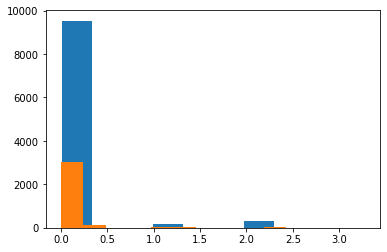

In [ ]:
import matplotlib.pyplot as plt

plt.hist(y_train)
plt.hist(y_test)